In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Đọc dữ liệu từ file CSV
url = "/content/drive/MyDrive/Gg Colab/Data/Iris.csv"
dataset = pd.read_csv(url)

In [50]:
#Printing DataFrame -only first 20 rows to understand what data look like
print(dataset.head(20))
#Data have 5 Columns ,First four are features and fifth is Classfication of the Iris type

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0    1            5.1           3.5            1.4           0.2  Iris-setosa
1    2            4.9           3.0            1.4           0.2  Iris-setosa
2    3            4.7           3.2            1.3           0.2  Iris-setosa
3    4            4.6           3.1            1.5           0.2  Iris-setosa
4    5            5.0           3.6            1.4           0.2  Iris-setosa
5    6            5.4           3.9            1.7           0.4  Iris-setosa
6    7            4.6           3.4            1.4           0.3  Iris-setosa
7    8            5.0           3.4            1.5           0.2  Iris-setosa
8    9            4.4           2.9            1.4           0.2  Iris-setosa
9   10            4.9           3.1            1.5           0.1  Iris-setosa
10  11            5.4           3.7            1.5           0.2  Iris-setosa
11  12            4.8           3.4            1.6           0.2

In [51]:
#findout unique classification/type of iris flower.
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [52]:
#findout no of rows for each Species.
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [53]:
#Importing Package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report  # Import classification_report

In [54]:
print(dataset.describe())
#count tells that all the 4 features have 150 rows
#in general ,From Mean we can say that sepal is larger than petal.

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [55]:
# Chia features và target
X = dataset.drop('Species', axis=1)  # Đặc trưng
y = dataset['Species']               # Nhãn


In [35]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# Chuẩn hóa dữ liệu
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
# Huấn luyện mô hình Perceptron
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=42)

In [58]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = perceptron.predict(X_test)

In [59]:
# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [60]:
# Báo cáo phân loại
print(classification_report(y_test, y_pred))  # Generate classification report

                 precision    recall  f1-score   support

    Iris-setosa       0.80      0.84      0.82        19
Iris-versicolor       0.70      0.54      0.61        13
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.80        45
      macro avg       0.79      0.79      0.79        45
   weighted avg       0.79      0.80      0.79        45



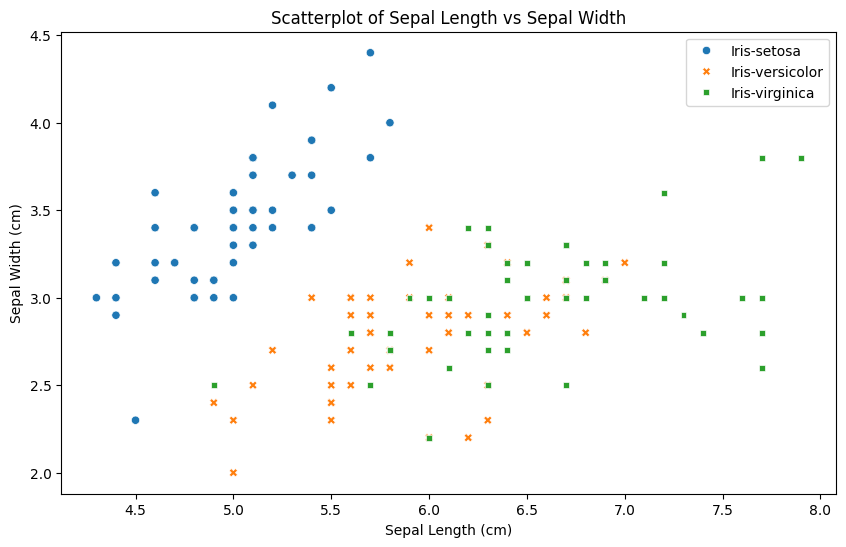

In [61]:
# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='SepalLengthCm', y='SepalWidthCm', hue='Species', style='Species')
plt.title('Scatterplot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(loc='upper right')
plt.show()

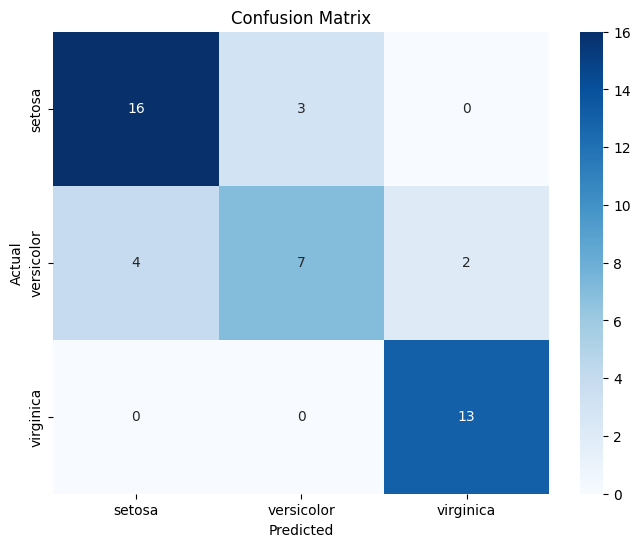

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate model
# Assuming you have already trained your model and made predictions
# Replace y_pred with your predicted labels
y_pred = perceptron.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=iris['species'].unique(), yticklabels=iris['species'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
